In [1]:
from google.colab import files
files.upload()  # Upload your kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajdharunr","key":"2db842b8255f14d00ce8e36478cad750"}'}

In [2]:
import os

# Move the Kaggle API key to the correct location
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
# Download the skin cancer dataset
!kaggle datasets download -d shashanks1202/skin-cancer-dataset

# Unzip
import zipfile
with zipfile.ZipFile("skin-cancer-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("data")


Dataset URL: https://www.kaggle.com/datasets/shashanks1202/skin-cancer-dataset
License(s): MIT
  0% 0.00/6.29M [00:00<?, ?B/s]
100% 6.29M/6.29M [00:00<00:00, 703MB/s]


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

# Load training and validation data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/data/train_cancer',  # path to extracted folder
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

valid_data = datagen.flow_from_directory(
    '/content/data/train_cancer',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 216 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,594,369 (21.34 MB)

 Trainable params: 5,594,369 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.fit(train_data, epochs=1, validation_data=valid_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.5751 - loss: 0.7143 - val_accuracy: 0.8889 - val_loss: 0.3648


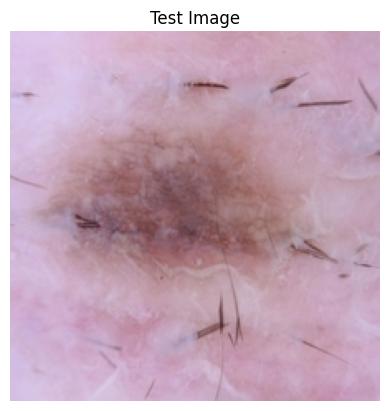

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Prediction Score: 0.9710254669189453
🔴 Cancer predicted


In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_image_path = '/content/data/train_cancer/benign/14.jpg'  # change to any available test image

# Load and preprocess image
img = image.load_img(test_image_path, target_size=img_size)
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0) / 255.0

# Predict
prediction = model.predict(img_arr)
print(f"Prediction Score: {prediction[0][0]}")

if prediction[0][0] > 0.5:
    print("🔴 Cancer predicted")
else:
    print("🟢 No cancer predicted")
